<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_2/yYGiBqtirSM.jpg" height="300" width="300"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер раз! </center>

Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2020). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/r_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------


__Краткий брифинг:__


* __Дедлайн:__ __10.05.20__
* Первая домашка затрагивает то, что мы смотрели на первых двух парах.
* Тетрадка делится на две части: __рыбёшки (65 баллов) и кит (35 баллов).__
* Часть задач нужно решить не только с помощью симуляций, но и вручную.
* Ваша команда пытается решить как можно больше задач и присылает их мне.
* Если очень хочется, можем устроить после всех дедлайнов серию из пар с разбором домашек. 
* Свои решения постараюсь выложить после дедлайна.
* __WARNING:__ [на страничке курса](https://github.com/FUlyankin/r_probability) есть решение домашек прошлого года. Ими можно пользоваться. Там много полезного и интересного! А ещё не стесняйтесь задавать вопросы :) 

---------------------------

* __Как оформлять домашки:__ 
    1. Компьютерные домашки оформляем либо в связке R + LaTeX, либо в юпитерских тетрадках (если хочется новых технологий), либо в связке R + Markdown. Все шаблоны для этого есть в репозитории. Пожалуйста не нужно присылать мне просто тупой код с выводами в виде комментариев, написанных через решёточки. Я от этого могу сойти с ума. 
    2. Ручные решение можно оформлять двумя способами: либо вбивать их в файл вместе с кодом. Благо в Markdown, юпитере и других местах поддерживаются теховские формулу. Либо аккуратно оформляйте их на бумаге и присылайте свёрстанную pdf-ку. Не надо кидать мне фотки по одной. Я от этого тоже сойду с ума. Вариант с вбиванием в основной файл - предпочтительнее. 
    
* На странице курса висит [видео-инструкция по оформлению.](https://yadi.sk/i/Pxp_pByP6Em9-A)

---------------------------

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [4]:
library("ggplot2")  # Пакет для красивых графиков 
#library("reshape2")

library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=8, repr.plot.height=6)

# Внимание! Если вы делаете дз в Rstudio, то вам не нужны пакеты grid, repr и т.п.
# Вам нужен только пакет ggplot2! 

### [2]  Задачка 1

Давайте уточним [правило трёх сигм.](https://ru.wikipedia.org/wiki/Среднеквадратическое_отклонение#Правило_трёх_сигм)

__Утверждение:__ $99.7\%$ вероятностной массы случайной величины $X \sim N(\mu,\sigma^2)$ лежит в интервале $\mu \pm c \cdot \sigma$. Чему равно значение константы $c$? А если речь про 80\%? 

In [5]:
# step указывавет шаг поиска 

get_c <- function(mean, sd, step) {
    for (c in seq(1, 5, by = step)) {
        probability = pnorm(c, mean = mean, sd = sd) - pnorm(-c, mean = mean, sd = sd)
        #print(probability)
        if (round(probability, 3) == 0.8) {
            print(sprintf("Для 80%% c = %f, вероятность %g", c, probability))
        } else if (round(probability, 3) == 0.997) {
            #print(round(probability, 3) == 0.997)
            print(sprintf("Для 99.7%% c = %e, вероятность %g", c, probability))
        }
    }
}

In [6]:
get_c(0, 1, 0.01)

[1] "Для 99.7% c = 2.930000e+00, вероятность 0.99661"
[1] "Для 99.7% c = 2.940000e+00, вероятность 0.996718"
[1] "Для 99.7% c = 2.950000e+00, вероятность 0.996822"
[1] "Для 99.7% c = 2.960000e+00, вероятность 0.996924"
[1] "Для 99.7% c = 2.970000e+00, вероятность 0.997022"
[1] "Для 99.7% c = 2.980000e+00, вероятность 0.997118"
[1] "Для 99.7% c = 2.990000e+00, вероятность 0.99721"
[1] "Для 99.7% c = 3.000000e+00, вероятность 0.9973"
[1] "Для 99.7% c = 3.010000e+00, вероятность 0.997388"
[1] "Для 99.7% c = 3.020000e+00, вероятность 0.997472"


In [30]:
sprintf('Для 99.7%%  с = %g', qnorm(1 - 0.003/2))
sprintf('Для 80%%  с = %g', qnorm(1 - 0.2/2))

[1] "Для 99.7%  с = 2.96774"

[1] "Для 80%  с = 1.28155"

### [3] Задачка 2

Давайте попробуем проверить несколько свойств математических ожиданий и дисперсий, которые вы доказали на лекциях по теории вероятностей в прошлом семестре. Выберите конкретные случайные величины (любые) и проверьте для них утверждения, перечисленные ниже. 

__[а]__ Верно ли, что $E(X + Y) = E(X) + E(Y)$? 

__[б]__ Верно ли, что $E(X \cdot Y) = E(X) \cdot E(Y)$?

__[в]__ Верно ли, что $Var(X + Y) = Var(X) + Var(Y) + 2 \cdot Cov(X,Y)$? 

__[г]__ Верно ли, что $Var(X \cdot Y) = Var(X) \cdot Var(Y)$? 

__[д]__ Верно ли, что если $Cov(X, Y) = 0$, то две случайные величины независимы? Удастся ли проверить это с помощью генераций? 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого кода тут

### [10]  Задачка 3

Таня сидит дома на самоизоляции уже третий месяц. Интернет отключили. Ей скучно. Она достала. из ящика $5$ лампочек, вкрутила их в люстру, поставила посреди комнаты стул и стала ждать когда первая лампочка перегорит. Время работы лампочек $T$ имеет экспоненциальное распределение с параметром $\lambda = 5$ минут.

-  Какова вероятность того, что первая лапочка проработает больше $10$ минут? 

In [8]:
# Для одной лампочки
1 - pexp(10, rate = 1/5)

[1] 0.1353353

-  Чему равен для первой лампочки $95\%$ квантиль? Как проинтерпретировать это число? 

__Ответ:__ _данное число означает, что $95\%$_ значений выборки меньше его


In [18]:
qexp(.95, rate = 1/5)

[1] 14.97866

Пусть случайная велчина $X = \min(T_1, \ldots, T_5)$ - время до перегорания первой лампочки. Оцените: 

- $P(X > 10)$
- $P(X > 10 \mid T_1 > 5)$
- $E(X)$
- $E(X \mid T_1 > 5)$

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого кода пам

Пусть случайная величина $Y = \max(T_1, \ldots, T_5)$ - время до перегорания последней лампочки. Оцените 

- $E(Y - X)$
- $P(Y > 2 X)$ 
- $Cov(X,Y)$,
- $Var(X), Var(Y)$, какая из дисперсий больше, почему?

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого шкода

__[бонусные 20 баллов]__

Попробуйте руками на бумажке выяснить какое распределение будет у случайных велчин $X$ и $Y$. 

- Найдите их плотности распрееления.
- Представим, что у нас $n$ лампочек. Как плотности распределения зависят от $n$?
- Найдите $E(X - Y)$. Куда оно стремится при $n \to \infty$?
- Если это возможно, найдите совместную плотность распределения $f(x, y)$
- Найдите $Cov(X, Y)$. Как она зависит от $n$? Куда она сходится при $n \to \infty$?

__Решение:__ 

In [8]:
### решение на бумажке

### [5]  Задачка 4

Продавщица баба Зина сидит в магазине. Повсюду самоизоляция. Единственное место куда можно сходить погулять - её магазин. Бабе Зине весело. 

Время между приходами людей в магазин распределено экспоненциально. В среднем за $10$ минут приходит $5$ покупателей. Время обслуживания тоже имеет экспоненциальное распределение. В среднем за $10$ минут баба Зина может обслужить $6$ человек. 

- Какова вероятность того, что в очереди стоит ровно $5$ человек? 
- Какова средняя длина очереди? 
- Постройте для длины очереди гистограмму. Как думаете какое у неё распределение?

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  ещё код

В магазин на работу вышла тётя Маша. Она обслуживает в среднем $7$ покупателей за $10$ минут. Два клиента подошли к кассам одновременно. Какова вероятность того, что тётя Зина обслужит клиента быстрее? 

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  снова код

### [5]  Задачка 5

Пока мир сидит на самоизоляции, технологические компании [тестируют свои беспилотные машины и поезда.](https://www.rbc.ru/technology_and_media/03/04/2020/5e871ecf9a794784dd22f1de)

Прямо сейчас от станции Ромашково друг за другом в одном направлении отходит $100$ паровозиков с интервалом в одну минуту. Стартовые скорости паравозиков - независимые, равномерные на отрезке $[0;1]$ случайные величины. Когда более быстрый паровозик догоняет более медленный, они снижает свою скорость до скорости догнанного паровозика. 

Через достаточно длинный интервал времени паровозики разобьются на несколько групп. С помощью симуляций найдитет ответ на следующие вопросы: 

__[а]__  Какова вероятность того, что пятый паровозик - лидер очередной группы? 

__[б]__  Пусть $X$ - число групп, на которое разбились паравозики. На сколько групп в среднем разбиваются паравозики?

__[в]__  Чему равна дисперсия количества групп?

__[г]__  Пусть случайная величина $T$ - время, в течение которого праовозики разбиваются на несколько групп. Оцените $E(T)$ и $Var(T)$. 

__[д]__ Оцените $Cov(X, T)$.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  снова код

__[бонусные 10 баллов]__ найдите решение пунктов __а, б, в__ руками на бумажке. (это задачка номер 78 из [культурного кода.](https://github.com/bdemeshev/probability_dna/blob/master/probability_dna.pdf)

In [12]:
### решение на бумажке

### [5]  Задачка 6

Денис тоже сидит в самоизоляции. Он берёт карты из хорошо перемешанной колоды с $36$ картами до тех пор, пока не возьмёт даму пик. Сколько в среднем бубновых карт он получит? 

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  снова код

Пусть каждая карта приносит Денису деньги согласно достоинству: шестёрка - $6$ рублей, $\ldots$, десятка - $10$ рублей, валет - $11$ рублей, дама - $12$ рублей, король - $13$ рублей, туз - $14$ рублей. 

Какова вероятность того, что Денис наберёт меньше $100$ рублей? 

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  снова код

### [10]  Задачка 7 (основано на реальных событиях) 

Филиппу $12$ лет, он играет в покер против своего брата Максима и его плюшевой обезьянки. Игра идёт в обычный покер без джокеров, колодой из $52$ карт, где всем игрокам сдаётся по $5$ карт на руки. 

С помощью симуляций расчитайте вероятности комбинаций: 

- Pair (пара) - две карты одного достоинства, три остальные - разного
- Two pairs (две пары)
- Three of kind (тройка) 
- Straight (стрит) - пять последовательных карт, есть карты разных мастей
- Flush (флэш) - все карты одной масти, но не последовательных достоинств
- Full House (фул-хаус) - три карты одного достоинства и две другого
- Four of Kind (каре) - четыре карты одного достоинства
- Straight Flush (стрит-флэш) - пять последовательных карт одной масти
- Royal Flush (роял-флэш) - старшие пять последовательных карт одной масти 



#### Подключаем либу с картами

In [8]:
#install.packages('prob')
library('prob')

#### Генерируем колоду из 52 карт

In [9]:
deck <- cards(jokers = FALSE, makespace = FALSE)
levels(deck$rank) <- c(levels(deck$rank), 11, 12, 13, 14)

# Делаем encoding xd, чтобы легче искать последовательности 
deck$rank[deck$rank == 'J'] <- 11
deck$rank[deck$rank == 'Q'] <- 12
deck$rank[deck$rank == 'K'] <- 13
deck$rank[deck$rank == 'A'] <- 14
deck$rank

deck

[1] 2  3  4  5  6  7  8  9  10 11 12 13 14 2  3  4  5  6  7  8  9  10 11 12 13
[26] 14 2  3  4  5  6  7  8  9  10 11 12 13 14 2  3  4  5  6  7  8  9  10 11 12
[51] 13 14
Levels: 2 3 4 5 6 7 8 9 10 J Q K A 11 12 13 14

rank,suit
<fct>,<fct>
2,Club
3,Club
4,Club
5,Club
6,Club
7,Club
8,Club
9,Club
10,Club


#### Пишем симуляцию случайной раздачи карт 
> Будем считать, что Филипп сидит слева от дилера, => Максим => обезьянка\
Раздаем по часовой

In [10]:
# Как запечатанная колода может быть разложена в другом порядке?

# Преобразует рандомную раздачу в карту
get_cards <- function(game, deck) {
    result <- list()
    for (player in game) {
        df <- data.frame(rank = as.numeric(as.character(deck[[1]][player])),
                         suit = as.character(deck[[2]][player]))
        result[[length(result) + 1]] <- df
        # as.numeric(as.character()) - такой костыль пздц
        # In particular, as.numeric applied to a factor is meaningless, 
        # and may happen by implicit coercion.
    }
    return(result)
}


# Генерирует рандомную раздачу
dealer <- function() {
    philip <- seq(from = 1, to = 15, by = 3)
    maxim <- seq(from = 2, to = 15, by = 3)
    monkey <- seq(from = 3, to = 15, by = 3)
    deck <- 1:52
    random_sample <- sample(deck, size = 15)
    return(list(random_sample[philip], random_sample[maxim], random_sample[monkey]))
}

# Проверяем, есть ли последовательность достоинств 
check_sequence <- function(cards){
    cards = sort(cards)
    low_straight = c(2, 3, 4, 5, 14)
    if(identical(cards, low_straight)){
        return(TRUE)
    }
    return(all(abs(diff(cards)) == 1))
}


#### Одна и две пары

In [11]:
is_pair <- function(game) {
    counter <- list(0, 0, 0, 0, 0, 0, 0, 0, 0)
    for (player in game) {
        is_sequence <- check_sequence(player$rank)
        pair = length(which(table(player$rank) > 2))
        trio = length(which(table(player$rank) > 3))
        unique_cards = length(unique(player$rank))
        is_flash = length(unique(player$suit)) == 1
        is_royal = identical(sort(player$rank), c(10, 11, 12, 13, 14))
        if (unique_cards == 4) {
            # Ищем одну пару
            counter[1] <- counter[[1]] + 1  # эхх += 
        } else if (unique_cards == 3 & (pair == 0)) {
            # Ищем две пары Второе условие отсеивает тройки (пример ['K','K','K','A','7'])
            counter[2] <- counter[[2]] + 1
        } else if (unique_cards == 3 & (pair != 0)) {
            # Ищем тройки(да, кода уже много, но не 3 же ф-ции, чтобы 500к лет ждать)
            counter[3] <- counter[[3]] + 1
        } else if (is_sequence & !is_royal & !is_flash) {
            # Ищем стрит 
            counter[4] <- counter[[4]] + 1
        } else if (!is_sequence & is_flash) {
            # Ищем флэш(не учитывая роял-флэш и стрит-флэш)
            counter[5] <- counter[[5]] + 1
        } else if (unique_cards == 2 & trio == 0) {
            # Ищем фул-хаус
            counter[6] <- counter[[6]] + 1
        } else if ((unique_cards == 2) & (trio != 0)) {
            # Ищем каре
            counter[7] <- counter[[7]] + 1
        } else if (is_sequence & is_flash & !is_royal){
            # Ищем стрит-флэш
            counter[8] <- counter[[8]] + 1
        } else if (is_royal & is_flash){
            # Ищем роял-стрит
            print(player$suit)
            print(player$rank)
            counter[9] <- counter[[9]] + 1
         }
    }
    return(counter)
}

In [12]:
get_probability <- function(n_games){
    results <- list(0, 0, 0, 0, 0, 0, 0, 0, 0)
    # Получаем подходящие события
    # results[1] - одна пара
    # results[2] - две пары
    # results[3] - тройка
    for (n in 1:n_games){
        pairs <- is_pair(get_cards(dealer(), deck = deck))
        for (i in 1:length(results)){
            results[i] <- results[[i]] + pairs[[i]]
        }
    }
    # Выводим результат
    type_of_event <- c('одну пару', 'две пары', 'тройку', 'стрит', 'флэш',
                       'фул-хаус', 'каре', 'стрит-флэш', 'роял-флэш')
    for(i in 1:length(results)){
        probability <- round(results[[i]]/(n_games * 3) * 100, digits = 5)
        text <- sprintf("Вероятность получить %s ~= %g %%", type_of_event[i], probability)
        print(text)
    }
    return(results)
}

In [13]:
get_probability(866320)

[1] "Heart" "Heart" "Heart" "Heart" "Heart"
[1] 10 11 12 14 13
[1] "Heart" "Heart" "Heart" "Heart" "Heart"
[1] 10 12 14 11 13
[1] "Heart" "Heart" "Heart" "Heart" "Heart"
[1] 11 12 10 13 14
[1] "Вероятность получить одну пару ~= 42.2356 %"
[1] "Вероятность получить две пары ~= 4.73005 %"
[1] "Вероятность получить тройку ~= 2.11258 %"
[1] "Вероятность получить стрит ~= 0.35314 %"
[1] "Вероятность получить флэш ~= 0.19777 %"
[1] "Вероятность получить фул-хаус ~= 0.14714 %"
[1] "Вероятность получить каре ~= 0.02301 %"
[1] "Вероятность получить стрит-флэш ~= 0.001 %"
[1] "Вероятность получить роял-флэш ~= 0.00012 %"


[[1]]
[1] 1097685

[[2]]
[1] 122932

[[3]]
[1] 54905

[[4]]
[1] 9178

[[5]]
[1] 5140

[[6]]
[1] 3824

[[7]]
[1] 598

[[8]]
[1] 26

[[9]]
[1] 3

У Филиппа на руках тройка королей. Какова вероятность, что его обыграет плюшевая обезьянка? 

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  немого кода здесь

__[бонусные 10]__ посчитайте все эти вероятности на бумажке руками

### [5]  Задачка 8

Коронавирус продолжает выкашивать людей! Мише это в конец надоело, поэтому он заперся в своей комнате в общаге и разработал новый тест на инфекцию. Тест Миши никогда не ошибается. Если человек болен, он моментально это находит. Есть только один нюанс. Тест очень дорого производить, а тестировать придётся всю Россию. 

Миша довольно находчивый и придумал способ сэкономить. Он предлагает разбить всех людей в России на группы по $k$ человек. Люди из одной группы сдают на анализ свои мазки из носоглотки. Дальше каким-то неведомым образом все эти мазки смешиваются в пробирке и она сдаётся на тест. Если тест выявляет, что в пробирке всё хорошо, все $k$ человек объявляются здоровыми. Если тест говорит, что в пробирке был вирус, все $k$ человек сдают индивидуальные тесты для поиска больных. 

__[а]__ Будем предполагать, что вероятность того, что человек инфицирован в день теста составляет $p = 0.001$. На какое количество групп нужно разбить людей, чтобы сэкономить как можно больше тестов? Сколько в среднем тестов будет сэкономлено?  Ответьте на этот вопрос с помощью симуляций. Все симуляции проводите в расчёте на $1000$ человек.

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

__[б]__ Предположим, что тест Миши всё-таки ошибается. Вероятность того, что он объявит здорового больным равна $0.02$. В обратную сторону ошибки не происходит. Какое значиние $k$ окажется оптимальным в таком случае? 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ и ещё кода

__[бонусные 10]__ Попробуйте решить предыдущие два пункта руками для произвольных вероятностей $p$ и $q$. Как именно оптимальное $k$ зависит от этих вероятностей? 

__Hint:__ При решении уравнения, которое получится после взятия производной от математического ожидания числа проверок, можно воспользоваться разложением в ряд Тэйлора: $(1 - p)^x \approx 1 - px$. Это можно сделать, если мы предполагаем, что вероятность заболеть $p$ очень маленькая.   

### [2]  Задачка 9

У Полины есть не только футболка студпассива, но и выборка, которая на $\frac{8}{10}$ пришла из нормального распределения с параметрами $0$ и $1$. Оставшаяся часть пришла из [распределения парето](http://ugrad.stat.ubc.ca/R/library/rmutil/html/Pareto.html) с параметарми $20$ и $2$. 

Правда ли, что хвосты такой смеси тяжелее, чем у стандартного нормального распределения? Нарисуйте гистограмму для смеси и плотность для нормального распределения на одной картинке, чтобы увидеть тяжесть хвостов. 

Кстати, Полина тоже сидит на самоизоляции дома и ей скучно. 

#### Подключим либу с парето распределением

In [13]:
# install.packages('rmutil')
library("rmutil")

#### Собираем распределение

In [14]:
n_obs <- 10^6
norm <- rnorm(8/10 * n_obs)
# Получается очень странно, если указывать параметры 20, 2
# Если указывать 2, 20, то вроде норм
pareto <- rpareto(2/10 * n_obs, 20, 2)
both <- c(norm, pareto)

In [15]:
summary(both)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -5.019    -0.488     0.301     4.041     1.325 17965.469 

> Если рисовать прямо так, то ничего не будет видно <br/>
Попробуем убрать выбросы

In [16]:
both <- both[both < 20]

#### Строим график

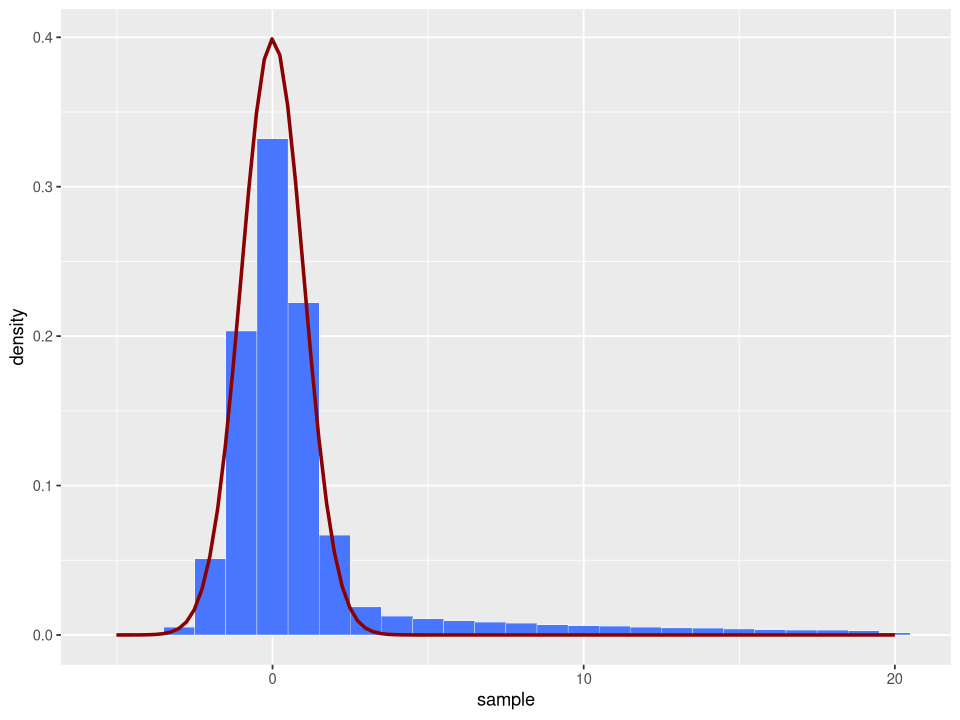

In [17]:
# Гистограмма смеси
df <- data.frame(sample = both)
plot <- ggplot(df, aes(x = sample, binwidth = 1)) + geom_histogram(aes(y = ..density..), 
    binwidth = 1, color = "white", fill = "royalblue1", size = 0.1) + stat_function(fun = dnorm, 
    args = list(mean = 0, sd = 1), color = "darkred", size = 1)

plot

> Виден тяжелый правый хвост

### [3]  Задачка 10

Пущай у нас есть стрёмная функция распределения. Например, вот такая: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Давайте сгенерим из неё выборку с помощью квантильного преобразования. 

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  напиши в меня коооод

### [5]  Задачка 11

У древнего морского монстра ~~Коронавируса~~ Кракена $8$ ног-щупалец. Если отрубить одно щупальце, то взамен него с вероятностью $0.25$ отрастает новое, с вероятностью $0.25$ отрастает два новых, с вероятностью $0.5$, слава Океану, не вырастает ничего. 

Против Кракена бьётся сам Капитан! Он наносит точные удары и безупречно умело уворачивается от ударов Кракена. 

__[а]__ Какова вероятность того, что Капитан победит, отрубив ровно $10$ щупалец? 

__[б]__ Какова вероятность, что бой Капитана и Кракена продлиться вечно? 

__[в]__ Сколько щупалец в среднем отрубит Капитан прежде, чем победит? 

Ответьте на эти вопросы с помощью симуляций.

__[бонусные 10]__ А также ручкой на бумаге! Если есть желание научиться решать подобные рекурсивные задачки, можно посмотреть [серию видосов от моего любимого ББ.](https://vimeo.com/showcase/2521777) Смотреть с первого :) 



> Ф-ция возвращает количество ударов, которое сделал капитан, чтобы победить кракена

In [39]:
battle <- function() {
    kraken <- 8
    hits <- 0
    while (kraken != 0) {
        
        # Капитан наносит удар
        kraken <- kraken - 1
        
        # Cчитаем число ударов
        hits <- hits + 1
        
        # Предпологаем, что наш рандом пришел из равномерного распределения
        event <- runif(1, 0, 1)
        if (event <= 0.5) {
            
        } else if (event > 0.5 & event <= 0.75) {
            kraken <- kraken + 1
        } else {
            kraken <- kraken + 2
        }
    }
    return(hits)
}

In [40]:
n_obs <- 10^6
# R очень медленно работает с append, так что заранее резервируеем память под
# наблюдения
observ <- rep(0, n_obs)

for (i in 1:n_obs) {
    observ[i] <- battle()
}

In [48]:
ten_hits <- observ[observ == 10]
ten_probability <- length(ten_hits)/n_obs

sprintf('[а] Капитан победит, отрубив 10 щупальцев, с вероятностью = %g', ten_probability)
sprintf('[б] 0, хз как на симуляциях это показать xd')
sprintf('[в] Перед победой капитан отрубит ~ %g щупальца', round(mean(observ)))

[1] "[а] Капитан победит, отрубив 10 щупальцев, с вероятностью = 0.012684"

[1] "[б] 0, хз как на симуляциях это показать xd"

[1] "[в] Перед победой капитан отрубит ~ 32 щупальца"

### [5] Задачка 12

У распределения Хи-квадрат есть милое свойство. Известно, что если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций в R, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

Хорошо! Теперь зафиксируйте несколько коридоров также, как мы делали это на паре и пронаблюдайте, как ведут себя вероятности пробить эти коридоры при увеличении $n$.

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

Учитывая, что последовательность случайных величин, приведённая выше, сходится к константе, то есть к вырожденному распределению, дисперсия этой последовательности должна сходится к нулю. Продемонстрируйте, что это действительно так. Для этого нужно скопипастить код из второго пункта и немного отредактировать его.  

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

Если вы хорошо разбирались в лекциях по математической статистике, у вас должна была возникнуть в голове аналогия с Достаточным условием Чебышёва. Оно говорит, что если оценка неизвестного параметра является несмещённой, $E(\hat \theta) = \theta$ и дисперсия этой оценки стремится к нулю, $Var(\hat \theta) \to 0$ при $n \to \infty$, то эта оценка состоятельна. 

Попробуйте ещё раз посмотреть на картинку, которую вы получили выше и переосмыслить это условие. Также не помешает немного подумать о состоятельности оценки и вспомнить определение состоятельности. 

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ──☆  наколдуй немного магии

### [5] Задачка 13

Ксюша ... сидит на самоизоляции. У неё есть куча книг и интернет, но она всё-равно скучает. Скучает по Василию Павловичу Решетникову и его лекциям по матстату. Ей безумно не хватает его экспрессии и таланта расказсчика. Поэтому, чтобы унять всю свою сердечную боль и пустоту, она читает книги [Черновой](https://github.com/FUlyankin/r_probability/raw/master/books/Хороший%20учебник%20по%20матстату.pdf) и [Лагутина](https://yadi.sk/i/UuWhEn_L4X_Rwg) про матстат. 

Сегодня тоска окончательно разъела сердце Ксюши. Поэтому она стала генеировровать равномерные случайные величины. 

- Ксюша взяла независимые случайные величны $X, Y \sim U[1,2]$. Немного поколдовав она получила случайную величину $Z = \frac{X}{X + Y}$. С помощью симуляций оцените математическое ожидание этой случайной величины сначала на $10$, потом на $11$, $\ldots$ , потом на $1000$ наблюдениях. Нарисуйте картинку, на которой будет видно к чему сходится эта оценка. 

In [40]:
set.seed(5)
expected_list <- rep(1, 990)
i <- 1


for (n_obs in 10:1000) {
    X <- runif(n_obs, 1, 2)
    Y <- runif(n_obs, 1, 2)
    Z <- X/(X + Y)
    expected_list[i] <- mean(Z)
    i <- i + 1
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



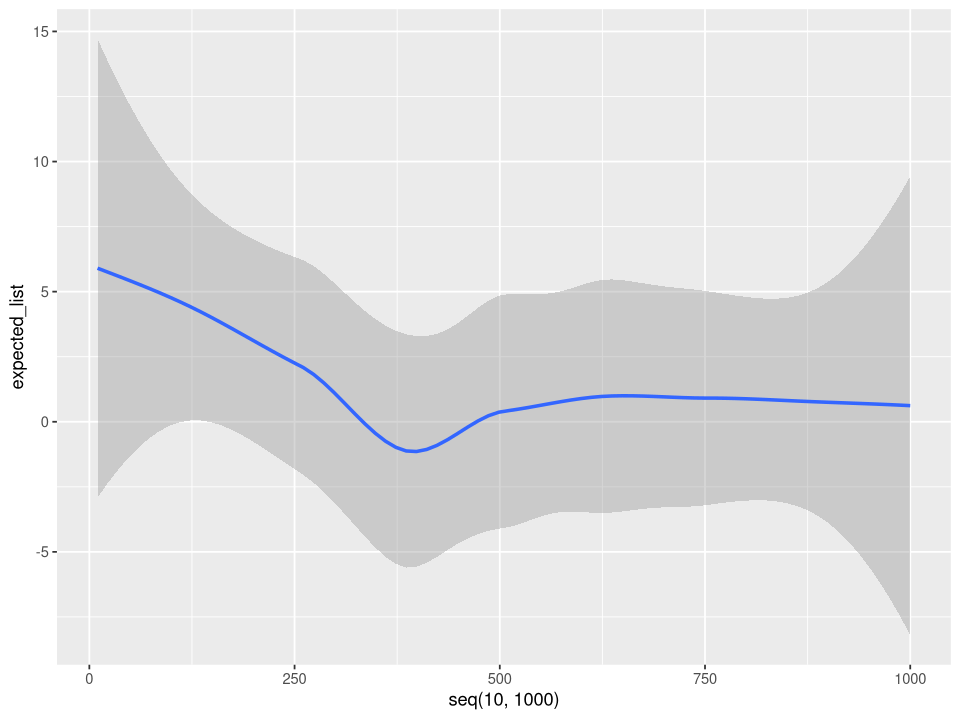

In [47]:
qplot(x = seq(10, 1000), y = expected_list, geom = "smooth")

- Тепреь Ксюша взяла независимые случайные величны $X, Y \sim U[-1,1]$. Постройте для $Z$ по аналогии с предыдущим картинку, на которой будет показано к чему сходится оценка математического ожидания этой случайной величины. Как думаете, почему с этой случайной величиной происходит такая странность?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



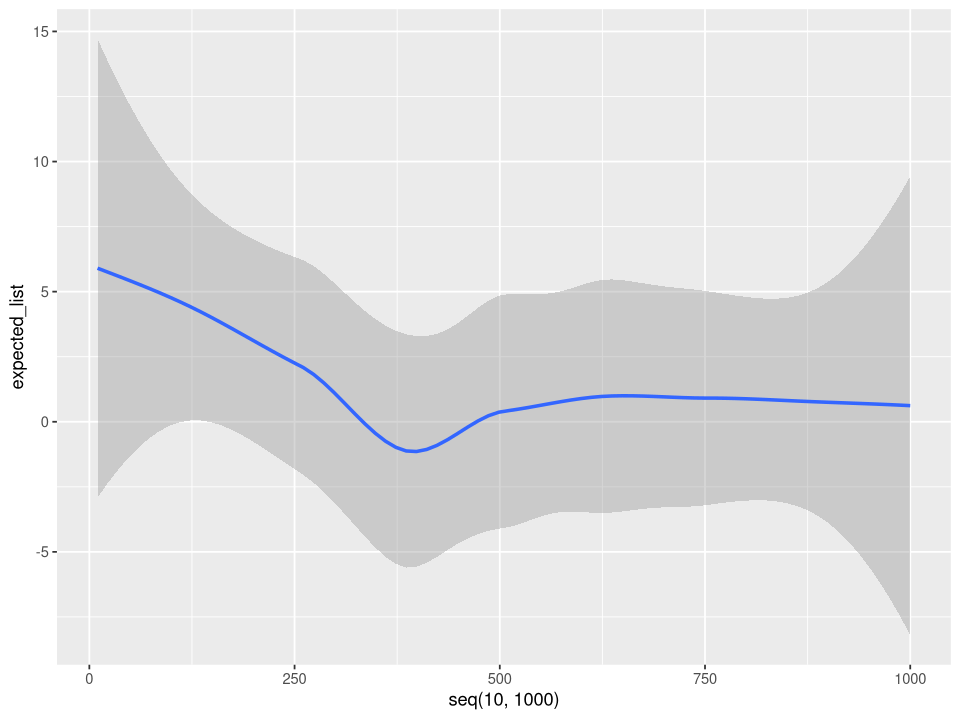

In [42]:
expected_list <- rep(1, 990)
i <- 1


for (n_obs in 10:1000) {
    X <- runif(n_obs, -1, 1)
    Y <- runif(n_obs, -1, 1)
    Z <- X/(X + Y)
    expected_list[i] <- mean(Z)
    i <- i + 1
}

qplot(x = seq(10, 1000), y = expected_list, geom = "smooth")

## [35+] Кит-рисёрчер

**Добро пожаловать в Кита. Кит — это большая рисёрчерская задача с огромным количеством вопросов. В ките есть как ручные вопросы, так и вопросы для симуляций. За каждый вопрос даётся какое-то количество баллов. В каких-то вопросах требуется решить задачу руками на бумажке. В каких-то вопросах требуется произвести симуляцию в R. Продвинтесь в своём рисёрче над этим китом как можно глубже и срубите куш из баллов.** 

На Земле есть филиал ада. Расположен он в Москве, утром, в час пик, на кончике лиловой ветки метро. Эта задача про него. 

Южный кончик лиловой ветки Московского метро состоит из станций: 

    ж  Пролетарская (впервые есть пересадка, люди выходят)    
    п  Волгоградский проспект  
    п  Текстильщики   
    ж  Кузьминки   
    п  Рязянский проспект  
    ж  Выхино  
    ж  Лермонтвоский проспект   
    ж  Жулебино (конечная)


Каждое утро на ветке разворачиваются драмматические события:

* Поезд едет от станции к станции $5$ минут. Из депо поезда запускают каждые 5 минут. В одном поезде помещается $500$ человек. Вместимость поезда описывается переменной $full$, которая принимает значение от $0$ до $1$ (доля занятых мест).
* Рассматривается период работы метро с $6$ часов утра до $15$ часов дня. 

* Разница во времени пика интенсивности между двумя соседними станциями состовляет $30$ минут. Так, в Жулебино максимальная интенсивность наблюдается в $07:30$, на Лермонтовском проспекте в $08:00$ и так далее.

* Все станции делятся на два типа: промышленные и жилые. Пик интенсивности на промышленных станциях в три раза ниже. 

![](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/HW/train_arrive.png)

In [28]:
station_name = c('жулебино', 'лермонтовский проспект', 'выхино', 'рязанский проспект', 
                'кузьминки', 'текстильщики', 'волгоградский проспект', 'пролетарская')

station_kind = c('ж', 'ж', 'ж', 'п', 'ж', 'п', 'п', 'ж')

Люди прибывают на платформу, чтобы сесть в поезд: 

* Случайная величина $Z \sim Poiss(\lambda)$ - число людей, которое прибыло на платформу в течение минуты. Интенсивность $\lambda$ зависит от времени и изменяется по функции: 

In [29]:
sigmoida = function(x) return(1/(1 + exp(-0.03*x)))
f = function(x) return(sigmoida(x)*(1 - sigmoida(x)))
f(5)

[1] 0.248599

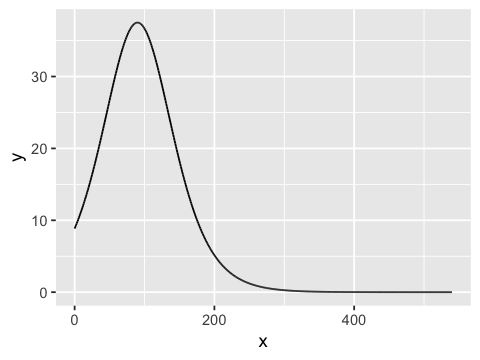

In [30]:
x = seq(0,540,0.01)
y = 150*f(x - 90)         # для жилых станций множитель 150 (высокий пик)
qplot(x, y, geom ='line') # пик на Жулебино в 7:30 (через 90 минут после открытия )

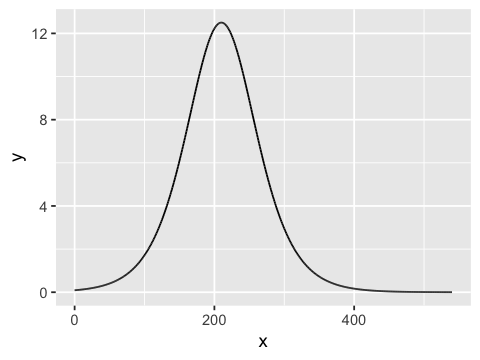

In [31]:
x = seq(0,540,0.01)
y = 50*f(x - 210)         # для промышленных станций множитель 50 (низкий пик)
qplot(x, y, geom ='line') # пик на Рязанском проспекте в 9:30 (через 210 минут после открытия)

Люди пытаются уехать на работу, но удаётся это далеко не всем:

* Каждый человек, который оказался на платформе, пытается зайти в поезд. Случайная величина $X$ принимает значение $1$, если ему это удаётся. Вероятность оказаться в поезде зависит от того насколько он заполнен: 

$$
P(X = 1) = 1 - (full)^k,
$$

где $full$ - доля, на которую загружен поезд, а $k$ - параметр, отвечающий за решимость людей садиться в него. Так, для Жулебино он равен $0.2$, потому что на очень то хочется заходить в поезд, где не осталось пустых сидений. Лучше подождать новый и присесть. Для Кузьминок он равен $2.6$, потому что поезда приезжают переполненными и люди настроены более решительно. 

* Будем считать, что люди заходят в поезд по очереди. Сначала первый, потом второй, потом третий и тд. После каждого нового зашедшего человека $full$ меняется и вероятность считается уже с новым значением параметра.


![](https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/HW/fullnes.png)

Вам предстоит просимулировать каждую минуту этого прекрасного утра на своём компьютере и ответить на вопросы: 

__а)__  На какой станции скапливается максимальное число людей? Во сколько это происходит? Постройте картинки с зависимостью числа людей на платформе от времени для каждой станции. Есть ли на этих картинках что-то странное? Как бы вы это объяснили? 

__б)__  Администрация метро хочет противодействовать проблемам со скапливанием людей. Для этого она придумывает стратегию "пустой поезд". Каждый пятый поезд, приезжающий в Кузьминки будет пустым. Он будет проезжать мимо всех станций и забирать людей из Кузьминок. Выберите оптимальное время запуска пустого поезда, руководствуясь результатами из пункта а). Насколько сильно такая стратегия ухудшит состояние всех оставшихся станций? Правда ли, что Кузьминки вздохнут спокойно и разгрузятся? 

__в)__  Администрация метро решила, что будет считать проблемы, возникающие при загрузке как сумму всех людей на станциях. На какую станцию оптимальнее всего посылать каждый пятый поезд пустым, чтобы минимизировать эту величину? 

Лучшее решение этой задачи будет направлено в мэрию. И Москва похорошеет ещё пуще прежнего. 

In [32]:
# Ваш код

__ВАЖНО:__ Задача в плане своего условия сформулированна очень громоздко и непонятно. Бонусные баллы можно получить, если придумать как упростить формулировку не потеряв в смысле. Также бонусные баллы можно получить за интересные идеи для симуляций. 